In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patch
from utils import ConvexPolygon, SimpleRandomConvexSet


def create_realization() -> ConvexPolygon:
    """
    Create a realization of a random rectangle with one vertex at the origin and the opposite vertex
    at [x,y] where x = cos(θ) and y = sin(θ), with θ chosen uniformly from [0, π/2].

    Returns
    -------
    ConvexPolygon
        A convex polygon representing a rectangle with vertices at:
        1. [0, 0] - origin
        2. [x, 0] - point on x-axis
        3. [x, y] - random point in first quadrant
        4. [0, y] - point on y-axis
        5. [0, 0] - closing the polygon
        where x = cos(θ), y = sin(θ), and θ is a random angle in [0, π/2].
    """
    theta = np.random.uniform(0, np.pi/2)
    x, y = np.cos(theta), np.sin(theta)
    return ConvexPolygon([[0,0], [x,0], [x,y], [0,y], [0,0]])

In [2]:
# defining simple random set using 1 000 realizations of the original random set
RS = SimpleRandomConvexSet([create_realization() for _ in range(1000)])

# expectation of selected random functionals
# x: x coordinate of the vertex opposite to the origin
# y: y coordinate of the vertex opposite to the origin
print(f"E(x): {np.mean([rect.points[2][0] for rect in RS.sets])}")
print(f"E(y): {np.mean([rect.points[2][1] for rect in RS.sets])}")
print(f"E(xy): {np.mean([rect.points[2][0]*rect.points[2][1] for rect in RS.sets])}")

E(x): 0.6344426976058506
E(y): 0.6381108960470302
E(xy): 0.31725789333718


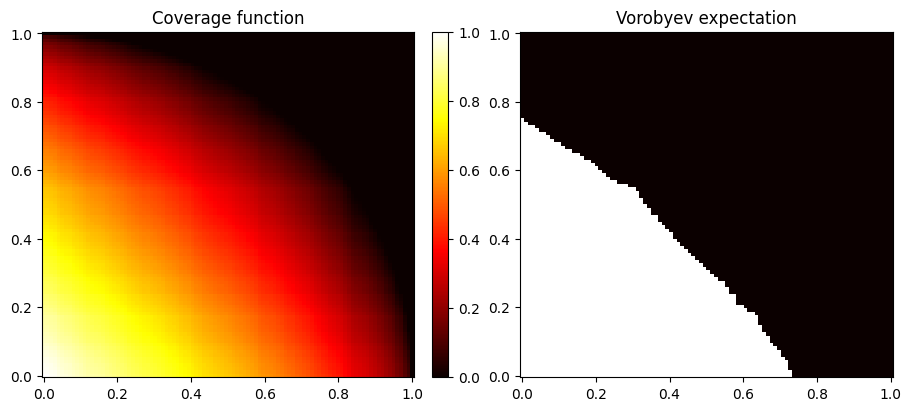

In [3]:
# computation of the empirical Vorobyev expectation (on the grid 100x100)
# WARNING, computation might take longer
RS.vorobyev_sim(100, 100, (0,1), (0,1))

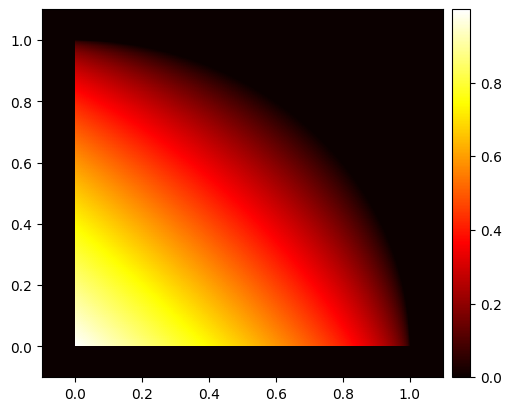

In [15]:
# theoretical coverage function
# p(x,y) = 2/pi * (arccos(x) - arcsin(y))
 
x_space, y_space = np.linspace(-0.1,1.1,1000), np.linspace(-0.1,1.1,1000)
cvg_function = np.zeros((1000,1000))
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        if x < 0 or y < 0 or x**2 + y**2 > 1:
            cvg_function[i,j] = 0
        else:
            cvg_function[i,j] = max(0, 2 * (np.arccos(x) - np.arcsin(y)) / np.pi)

fig, ax = plt.subplots(1,2, figsize=(5,4), gridspec_kw={'width_ratios': [44,2]}, constrained_layout=True)
a0 = ax[0].pcolormesh(x_space, y_space, cvg_function.T, cmap="hot")
ax[1] = plt.colorbar(a0, cax=ax[1])
plt.show()

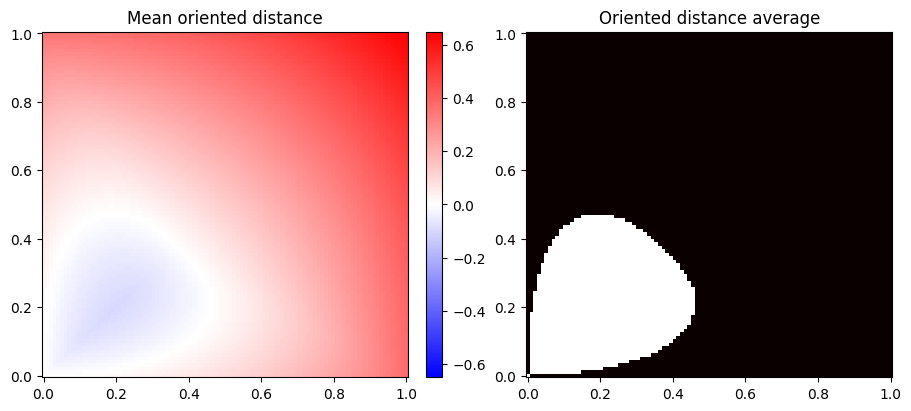

In [8]:
# computation of the empirical ODA expectation (on the grid 100x100)
# WARNING, computation might take longer
RS.oda_sim(100, 100, (0,1), (0,1))

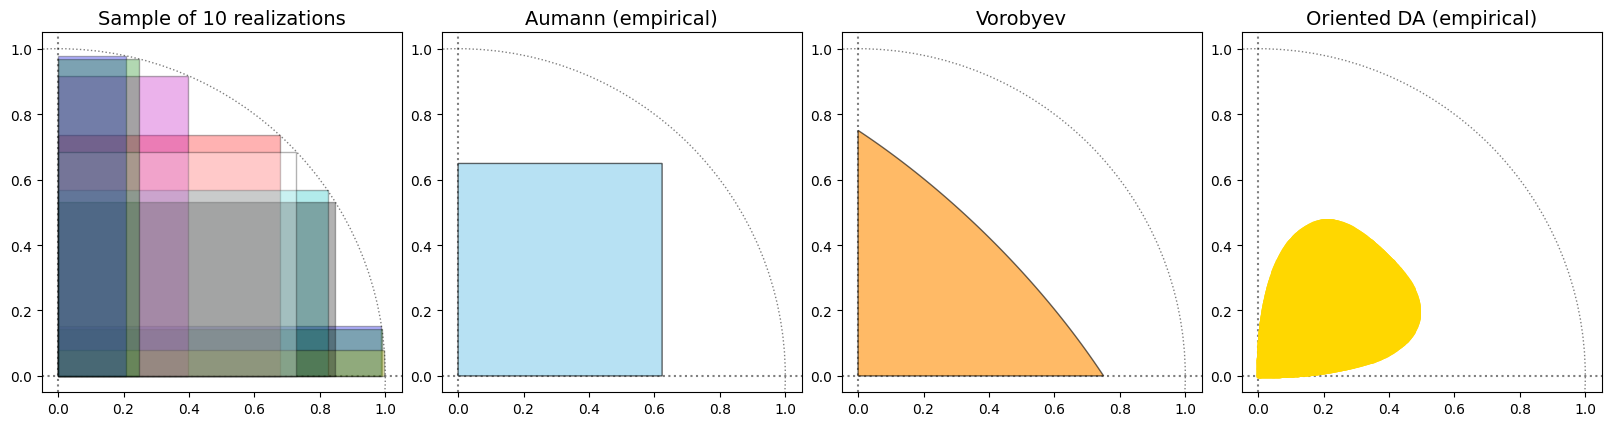

In [48]:
# graphical output - sample of 10 realizations, Aumann, Vorobyev and ODA expectation
fig,ax = plt.subplots(1,4,figsize=(16,4), constrained_layout=True)
plt.setp(ax, aspect="equal", xlim=(-0.05,1.05), ylim=(-0.05,1.05))

for a in ax:
    a.add_patch(patch.Circle((0, 0), 1, fill=False, ec="black", zorder=0, ls=":", alpha=0.5))
    a.axhline(zorder=0, color="black", alpha=0.5, ls=":")
    a.axvline(zorder=0, color="black", alpha=0.5, ls=":")

with open("Example3_data.json", "r") as f:
    data = json.load(f)
    vorobyev = data["vorobyev"]
    ODA_xp, ODA_yp = data["ODA"]

for i in range(10):
    ax[0].add_patch(patch.Rectangle((0, 0), RS.sets[i].points[2][0], RS.sets[i].points[2][1], ec="black", fc=list("bgrcmykw")[i % 8], alpha=0.3))
ax[1].add_patch(patch.Polygon(RS.aumann().points, fc="skyblue", ec="black", alpha=0.6))
ax[2].add_patch(patch.Polygon(vorobyev, fc="darkorange", ec="black", alpha=0.6))
ax[3].scatter(ODA_xp, ODA_yp, s=1, marker="s", c="gold")

ax[0].set_title("Sample of 10 realizations", fontsize=14)
ax[1].set_title("Aumann (empirical)", fontsize=14)
ax[2].set_title("Vorobyev", fontsize=14)
ax[3].set_title("Oriented DA (empirical)", fontsize=14)

plt.show()